# Explorando - Visualización de datos

## Indicadores de Desarrollo Mundial

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('wdi/Indicators.csv')
data.shape

(5656458, 6)

In [3]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [4]:
filter = data['CountryName'] == 'Spain'
data[filter].head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
19522,Spain,ESP,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,10.056400
19523,Spain,ESP,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,55.132352
19524,Spain,ESP,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,12.695256
19525,Spain,ESP,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,42.437095
19526,Spain,ESP,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,1960,8.314033


### ¿Cuántos países hay?

In [5]:
countries = data['CountryName'].unique().tolist()
print(f'Total países: {len(countries)}')

Total países: 247


### ¿cuántos códigos de países hay?

In [6]:
countryCodes = data['CountryCode'].unique().tolist()
print(f'Total códigos de países: {len(countries)}')

Total códigos de países: 247


### ¿Cuántos indicadores hay?

In [7]:
indicators = data['IndicatorName'].unique().tolist()
print(f'Total indicadores: {len(indicators)}')

Total indicadores: 1344


### ¿De cuántos años tenemos información?

In [8]:
years = data['Year'].unique().tolist()
print(f'Total años: {len(years)}')

Total años: 56


### ¿Cuál es el rango temporal?

In [9]:
print(f'Rango tremporal desde {min(years)} a {max(years)}.')

Rango tremporal desde 1960 a 2015.


# Matplotlib: Gráficos básicos
Vamos a explorar las emisiones per de un país en particular.

In [12]:
# Nombre del indicador => CO2 emissions (metric tons per capita)
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'ESP'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

# Aplicamos ambas máscaras.
total_co2 = data[mask1 & mask2]
total_co2.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4452312,Spain,ESP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2007,7.920891
4632435,Spain,ESP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2008,7.165452
4810986,Spain,ESP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2009,6.216973
4996776,Spain,ESP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2010,5.815787
5175009,Spain,ESP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.790764


## Veamos cómo cambiaron las emisiones en el tiempo

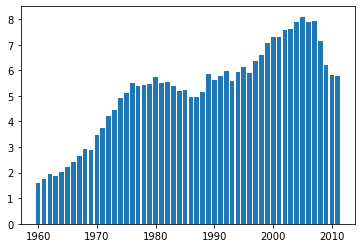

In [28]:
# Obtenemos los años
years = total_co2['Year']

# Obtenemos los valores de cada año.
co2 = total_co2['Value']

# Dibujamos.
plt.bar(years, co2)
plt.show()

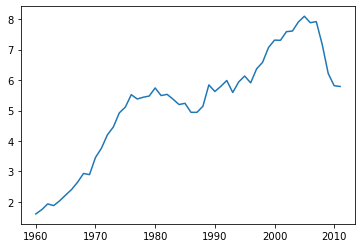

In [35]:
# Cambiamos a gráfico de líneas.
plt.plot(total_co2['Year'].values, total_co2['Value'])
plt.show()

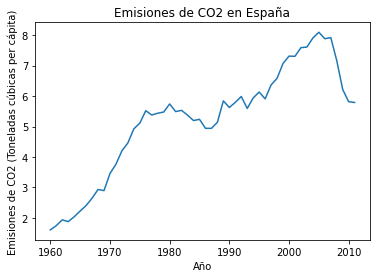

In [34]:
# Ponemos etiquetas a los ejes.
plt.xlabel('Año')
plt.ylabel('Emisiones de CO2 (Toneladas cúbicas per cápita)')

# Añadimos un título al gráfico.
plt.title('Emisiones de CO2 en España')

# Corregimos las escalas.

plt.plot(total_co2['Year'].values, total_co2['Value'])
plt.show()

### Usando histogramas para explorar la distribución de valores

In [38]:
# Primero aislamos la columna Value del dataframe total_co2, este será una Serie.

hist_data = total_co2['Value']
print(type(hist_data))

<class 'pandas.core.series.Series'>


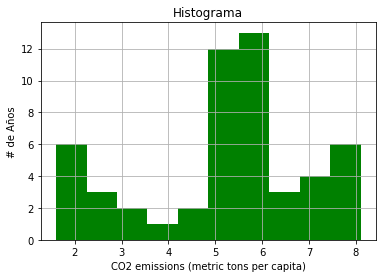

In [39]:
# Dibujamos el histograma.

plt.hist(hist_data, 10, facecolor='green')

# Ponemos etiquetas a los ejes.
plt.xlabel(total_co2['IndicatorName'].iloc[0])
plt.ylabel('# de Años')

# Añadimos un título al gráfico.
plt.title('Histograma')

plt.grid(True)
plt.show()

### Pero... ¿cómo está España con respecto a otros países?

In [40]:
# Seleccionamos todos los países en el año 2011.
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year])

# Aplicamos las máscaras.
co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [41]:
print(len(co2_2011))

232


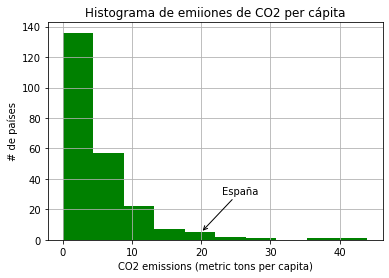

In [45]:
fig, ax = plt.subplots()

ax.annotate(
    "España",
    xy=(20, 5), xycoords='data',
    xytext=(23, 30), textcoords='data',
    arrowprops=dict(
        arrowstyle='->',
        connectionstyle='arc3'
    )
)

plt.hist(co2_2011['Value'], 10, density=False, facecolor='green')

plt.xlabel(total_co2['IndicatorName'].iloc[0])
plt.ylabel('# de países')
plt.title('Histograma de emiiones de CO2 per cápita')

plt.grid(True)
plt.show()

In [47]:
# Seleccionamos el PIB de España (GDP).
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'ESP'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

# Aplicamos las máscaras.
gdp_stage = data[mask1 & mask2]
gdp_stage.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
19580,Spain,ESP,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,6271.857057
45680,Spain,ESP,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,6949.499029
73878,Spain,ESP,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,7571.233894


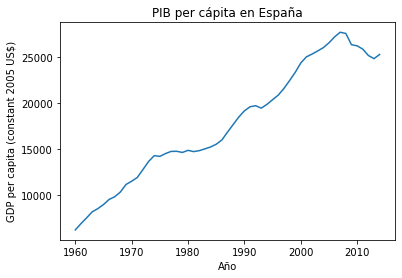

In [48]:
# Dibujamos un gráfico de líneas.
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

plt.xlabel('Año')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])
plt.title('PIB per cápita en España')

plt.show()

### Gráfico de dispersión para comparar PIB vs CO2
Para este "Scatter plot" nos tenemos que asegurar que estamos viendo tanto en PIB como en CO2 las mismas ventanas temporales.

In [50]:
print(f'PIB min year: {gdp_stage["Year"].min()}, max: {gdp_stage["Year"].max()}')
print(f'CO2 min year: {total_co2["Year"].min()}, max: {total_co2["Year"].max()}')

PIB min year: 1960, max: 2014
CO2 min year: 1960, max: 2011


In [51]:
# Cuidado! Tenemos 3 años adicionales de PIB con respecto a CO2.

In [54]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(total_co2))

52
52


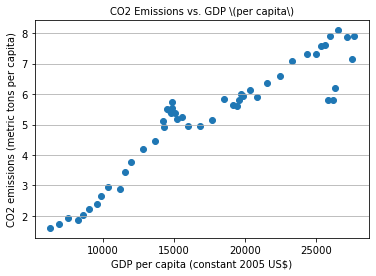

In [55]:
fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)', fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0], fontsize=10)
axis.set_ylabel(total_co2['IndicatorName'].iloc[0], fontsize=10)

X = gdp_stage_trunc['Value']
Y = total_co2['Value']

axis.scatter(X, Y)
plt.show()

In [57]:
# Imprimimos una tabla de coeficientes de correlación.
np.corrcoef(gdp_stage_trunc['Value'], total_co2['Value'])

# Se puede ver cómo hay una estrecha relación entre los valores.

array([[1.        , 0.92645763],
       [0.92645763, 1.        ]])

### Los gráficos, hablan!

El gráfico anterior nos indica que según aumenta el PIB (GDP) se aumentan las emisiones de CO2, pero también podemos ver un quiebre en los puntos en los que más PIB hemos generado, entorno a los 26000-27000, donde también ha bajado la cantidad de CO2 emitido, y este quiebre se está produciendo cuando más dinero se está generando. Esto habla de una posible inversión en la protección del medioambiente, en el caso de España.